# MULTI-LABEL CLASSIFICATION

##Feature Engineering

In [1]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"manojkumar83000","key":"a6c354dd1bc5460d07ffb4844b923064"}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d yekenot/fasttext-crawl-300d-2m


 99% 1.43G/1.44G [00:17<00:00, 119MB/s]
100% 1.44G/1.44G [00:17<00:00, 88.5MB/s]


In [ ]:
!7z e fasttext-crawl-300d-2m.zip -o/content -r



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1545551987 bytes (1474 MiB)

Extracting archive: fasttext-crawl-300d-2m.zip
--
Path = fasttext-crawl-300d-2m.zip
Type = zip
Physical Size = 1545551987

  0%      0% - crawl-300d-2M.vec                          1% - crawl-300d-2M.vec                          2% - crawl-300d-2M.vec                          3% - crawl-300d-2M.vec                          4% - crawl-300d-2M.vec                          5% - crawl-300d-2M.vec                        

In [6]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 10.5MB/s 


In [7]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import tqdm
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset

In [8]:
preprocessed_data_train=pd.read_csv("preprocessed_data_train.csv")#loading preprocessed data into panda Dataframe

In [9]:
preprocessed_data_train=preprocessed_data_train.dropna()#removing the nan values

In [10]:
preprocessed_data_test=pd.read_csv("preprocessed_data_test.csv")#loading preprocessed data into panda Dataframe
preprocessed_data_test.head(4)

,Unnamed: 0,Description,commenting,ogling,groping,cleaned_text
0,0,"During morning, a woman was walking by and thi...",1,1,0,morning woman walking thin guy came around cal...
1,1,A man tried to brush his penis off of a woman'...,0,0,1,man tried brush penis woman shoulder bus
2,2,This happened to a fellow passenger of mine tr...,0,1,0,happened fellow passenger mine travelling metr...
3,3,ogling,0,1,0,ogling


In [ ]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def fasttextModel(gloveFile):
    print ("Loading Fasttext Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}#for storing word and the corresponding embedding vector for that word
    for line in f:
        splitLine = line.split()#splitting the line and storing it in a list
        word = splitLine[0]#getting the first element and storing it in word
        embedding = np.array([float(val) for val in splitLine[1:]])#obtaining corresponding vector for that word
        model[word] = embedding#storing word as key and embedding vector for that word as value
    print ("Done.",len(model)," words loaded!")
    return model
model = fasttextModel('/content/crawl-300d-2M.vec')

Loading Fasttext Model
Done. 2000000  words loaded!


In [ ]:
words = []#for storing all the words in the train data
for i in preprocessed_data_train['cleaned_text']:
    words.extend(str(i).split(' '))

words = set(words)#getting corresponding unique words in the whole text corpus
print("the unique words in the corpus", len(words))#printing the uniques words length

#here we are obtainig the embeddings for the words that are present in the whole corpus
words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("fastvec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('fast_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

the unique words in the corpus 7877
fastvec length 6731


In [ ]:
with open('fast_vectors', 'rb') as f:
    model = pickle.load(f)
    fast_words =  set(model.keys())

In [ ]:
model['walking']

array([-0.0051, -0.4417, -0.044 , -0.344 , -0.1405, -0.1064,  0.1349,
       -0.0281,  0.3249,  0.0485,  0.1994,  0.1098,  0.5005, -0.0635,
       -0.2376,  0.1094, -0.1058, -0.0696, -0.0585,  0.3074,  0.1115,
       -0.0943, -0.3071, -0.21  ,  0.1331, -0.2107, -0.0882,  0.1755,
       -0.0358,  0.1818,  0.0921,  0.1831, -0.0982, -0.3284, -0.1072,
       -0.384 , -0.0036,  0.3687,  0.1681, -0.0567, -0.1918, -0.337 ,
       -0.206 , -0.1122,  0.0433,  0.0639, -0.0275,  0.2598,  0.1519,
        0.0347, -0.2054, -0.3528,  0.4976, -0.1242,  0.2713,  0.039 ,
       -0.0139, -0.1997,  0.0187,  0.0664, -0.0383, -0.0274, -0.1064,
       -0.0861,  0.0717, -0.0934,  0.3908, -0.2086,  0.1645, -0.6222,
       -0.1018, -0.3692,  0.2942,  0.0502,  0.1019, -0.141 , -0.6319,
       -0.0846,  0.0254, -0.2069, -0.1305, -0.1702, -0.1573,  0.1331,
       -0.4226,  0.0945,  0.139 , -0.4037, -0.1124,  0.2481,  0.188 ,
        0.2011,  0.14  ,  0.147 , -0.031 ,  0.3591, -0.0417, -0.5554,
        0.1189, -0.1

In [ ]:
text=preprocessed_data_train['cleaned_text'].values

In [ ]:
fast_text_vectors= [];
for sentence in text: # for each review/sentence
    sentence=str(sentence)  
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in fast_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words#here we are averaging the vectors for individual sentence
    fast_text_vectors.append(vector)

print(len(fast_text_vectors))
print(len(fast_text_vectors[0]))

7200
300


In [ ]:
text1=preprocessed_data_test['cleaned_text'].values

In [ ]:
fast_text_vectors1= [];
for sentence in text1: # for each review/sentence
    sentence=str(sentence)  
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in fast_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words#here we are averaging the vectors for individual sentence
    fast_text_vectors1.append(vector)

print(len(fast_text_vectors1))
print(len(fast_text_vectors1[0]))

1701
300


In [ ]:
from scipy.sparse import coo_matrix
fasttext_train=coo_matrix(fast_text_vectors)
fasttext_test=coo_matrix(fast_text_vectors1)


Adding Extra Features

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

In [ ]:
def length(text):
    return len(str(text))
def word_count(text):
    text=str(text)
    text=text.split()
    return len(text)
def stop_words_count(text):
    text=str(text)
    stop_words=set(stopwords.words('english'))
    text = [word for word in text.split() if word.lower() in stop_words]
    return len(text)
def unique_words(text):
    text=str(text)
    text=text.split()
    length=len(set(text))
    return length

In [ ]:
#https://www.kaggle.com/shivamb/extensive-text-data-feature-engineering
def get_subjectivity(text):
    try:
        textblob = TextBlob(unicode(text, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#here we are adding some extra features to the dataset
preprocessed_data_train['char_count']=preprocessed_data_train['Description'].apply(length)#counting the no of characters in each sentence
preprocessed_data_train['word_count']=preprocessed_data_train['Description'].apply(word_count)#counting the no of words in each sentence
preprocessed_data_train['stopwords_count']=preprocessed_data_train['Description'].apply(stop_words_count)#counting the no of stopwords in each sentence
preprocessed_data_train['unique_words']=preprocessed_data_train['Description'].apply(unique_words)#counting the no of unique words in each sentence
preprocessed_data_train['word_density']=preprocessed_data_train['char_count']/(preprocessed_data_train['word_count']+1)#calculating the word density in each sentence
preprocessed_data_train['subjectivity']=preprocessed_data_train['cleaned_text'].apply(get_subjectivity)#calculating subjectivity scores for each sentence

In [ ]:
#here we are adding some extra features to the dataset
preprocessed_data_test['char_count']=preprocessed_data_test['Description'].apply(length)#counting the no of characters in each sentence
preprocessed_data_test['word_count']=preprocessed_data_test['Description'].apply(word_count)#counting the no of words in each sentence
preprocessed_data_test['stopwords_count']=preprocessed_data_test['Description'].apply(stop_words_count)#counting the no of stopwords in each sentence
preprocessed_data_test['unique_words']=preprocessed_data_test['Description'].apply(unique_words)#counting the no of unique words in each sentence
preprocessed_data_test['word_density']=preprocessed_data_test['char_count']/(preprocessed_data_test['word_count']+1)#calculating the word density in each sentence
preprocessed_data_test['subjectivity']=preprocessed_data_test['cleaned_text'].apply(get_subjectivity)#calculating subjectivity scores for each sentence

In [ ]:
preprocessed_data_train.head(4)

,Unnamed: 0,Description,commenting,ogling,groping,cleaned_text,char_count,word_count,stopwords_count,unique_words,word_density,subjectivity
0,0,"Was walking along crowded street, holding mums...",0,0,1,walking along crowded street holding mum hand ...,183,36,15,35,4.945946,0.0
1,1,This incident took place in the evening.I was ...,0,1,0,incident took place evening metro two guy star...,89,16,7,14,5.235294,0.0
2,2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus man came bike offering liftvto you...,85,18,9,16,4.473684,0.0
3,3,Incident happened inside the train,0,0,0,incident happened inside train,34,5,1,5,5.666667,0.0


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import numpy as np
def sentiment_score(X,feature):#this function is for calculating the sentimental scores of each sentence
    neg=[]#calculating the negative sentimental scores and adding to the list
    neu=[]#calculating the neutral sentimental scores and adding to the list
    pos=[]#calculating the positive sentimental scores and adding to the list
    compound=[]
    for i in range(len(X)):
        for_sentiment=X[feature].iloc[i]#here we are obtaining the individual sentence 
        for_sentiment=str(for_sentiment)
        ss=sid.polarity_scores(for_sentiment)
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        compound.append(ss['compound'])
    return np.asarray(neg).reshape(-1,1),np.asarray(neu).reshape(-1,1),np.asarray(pos).reshape(-1,1),np.asarray(compound).reshape(-1,1)

In [ ]:
p_neg,p_neu,p_pos,p_compound=sentiment_score(preprocessed_data_train,'cleaned_text')

In [ ]:
#adding polarity scores as features
preprocessed_data_train['neg']=p_neg
preprocessed_data_train['neu']=p_neu
preprocessed_data_train['pos']=p_pos
preprocessed_data_train['compound']=p_compound

In [ ]:
p_neg1,p_neu1,p_pos1,p_compound1=sentiment_score(preprocessed_data_test,'cleaned_text')

In [ ]:
#adding polarity scores as features
preprocessed_data_test['neg']=p_neg1
preprocessed_data_test['neu']=p_neu1
preprocessed_data_test['pos']=p_pos1
preprocessed_data_test['compound']=p_compound1

In [ ]:
preprocessed_data_train.head(4)

,Unnamed: 0,Description,commenting,ogling,groping,cleaned_text,char_count,word_count,stopwords_count,unique_words,word_density,subjectivity,neg,neu,pos,compound
0,0,"Was walking along crowded street, holding mums...",0,0,1,walking along crowded street holding mum hand ...,183,36,15,35,4.945946,0.0,0.0,0.849,0.151,0.4939
1,1,This incident took place in the evening.I was ...,0,1,0,incident took place evening metro two guy star...,89,16,7,14,5.235294,0.0,0.0,1.000,0.000,0.0000
2,2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus man came bike offering liftvto you...,85,18,9,16,4.473684,0.0,0.0,1.000,0.000,0.0000
3,3,Incident happened inside the train,0,0,0,incident happened inside train,34,5,1,5,5.666667,0.0,0.0,1.000,0.000,0.0000


In [ ]:
preprocessed_data_train.shape

(7200, 16)

Standardizing Numerical Features

In [ ]:
#Standardizing the char_count feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['char_count'].values.reshape(-1,1))
char_count_train=scaler.transform(preprocessed_data_train['char_count'].values.reshape(-1,1))
char_count_test=scaler.transform(preprocessed_data_test['char_count'].values.reshape(-1,1))
char_count_train=char_count_train.reshape(-1,1)
char_count_test=char_count_test.reshape(-1,1)
print(char_count_train.shape)
print(char_count_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the word_count feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['word_count'].values.reshape(-1,1))
word_count_train=scaler.transform(preprocessed_data_train['word_count'].values.reshape(-1,1))
word_count_test=scaler.transform(preprocessed_data_test['word_count'].values.reshape(-1,1))
word_count_train=word_count_train.reshape(-1,1)
word_count_test=word_count_test.reshape(-1,1)
print(word_count_train.shape)
print(word_count_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the stopwords_count feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['stopwords_count'].values.reshape(-1,1))
stopwords_count_train=scaler.transform(preprocessed_data_train['stopwords_count'].values.reshape(-1,1))
stopwords_count_test=scaler.transform(preprocessed_data_test['stopwords_count'].values.reshape(-1,1))
stopwords_count_train=stopwords_count_train.reshape(-1,1)
stopwords_count_test=stopwords_count_test.reshape(-1,1)
print(stopwords_count_train.shape)
print(stopwords_count_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the unique_words feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['unique_words'].values.reshape(-1,1))
unique_words_train=scaler.transform(preprocessed_data_train['unique_words'].values.reshape(-1,1))
unique_words_test=scaler.transform(preprocessed_data_test['unique_words'].values.reshape(-1,1))
unique_words_train=unique_words_train.reshape(-1,1)
unique_words_test=unique_words_test.reshape(-1,1)
print(unique_words_train.shape)
print(unique_words_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the word_density feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['word_density'].values.reshape(-1,1))
word_density_train=scaler.transform(preprocessed_data_train['word_density'].values.reshape(-1,1))
word_density_test=scaler.transform(preprocessed_data_test['word_density'].values.reshape(-1,1))
word_density_train=word_density_train.reshape(-1,1)
word_density_test=word_density_test.reshape(-1,1)
print(word_density_train.shape)
print(word_density_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the subjectivity feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['subjectivity'].values.reshape(-1,1))
subjectivity_train=scaler.transform(preprocessed_data_train['subjectivity'].values.reshape(-1,1))
subjectivity_test=scaler.transform(preprocessed_data_test['subjectivity'].values.reshape(-1,1))
subjectivity_train=subjectivity_train.reshape(-1,1)
subjectivity_test=subjectivity_test.reshape(-1,1)
print(subjectivity_train.shape)
print(subjectivity_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the neg feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['neg'].values.reshape(-1,1))
neg_train=scaler.transform(preprocessed_data_train['neg'].values.reshape(-1,1))
neg_test=scaler.transform(preprocessed_data_test['neg'].values.reshape(-1,1))
neg_train=neg_train.reshape(-1,1)
neg_test=neg_test.reshape(-1,1)
print(neg_train.shape)
print(neg_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the neu feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['neu'].values.reshape(-1,1))
neu_train=scaler.transform(preprocessed_data_train['neu'].values.reshape(-1,1))
neu_test=scaler.transform(preprocessed_data_test['neu'].values.reshape(-1,1))
neu_train=neu_train.reshape(-1,1)
neu_test=neu_test.reshape(-1,1)
print(neu_train.shape)
print(neu_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the pos feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['pos'].values.reshape(-1,1))
pos_train=scaler.transform(preprocessed_data_train['pos'].values.reshape(-1,1))
pos_test=scaler.transform(preprocessed_data_test['pos'].values.reshape(-1,1))
pos_train=pos_train.reshape(-1,1)
pos_test=pos_test.reshape(-1,1)
print(pos_train.shape)
print(pos_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
#Standardizing the compound feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intializing StandardScaler
scaler.fit(preprocessed_data_train['compound'].values.reshape(-1,1))
compound_train=scaler.transform(preprocessed_data_train['compound'].values.reshape(-1,1))
compound_test=scaler.transform(preprocessed_data_test['compound'].values.reshape(-1,1))
compound_train=compound_train.reshape(-1,1)
compound_test=compound_test.reshape(-1,1)
print(compound_train.shape)
print(compound_test.shape)

(7200, 1)
(1701, 1)


In [ ]:
y_train=preprocessed_data_train[['commenting','ogling','groping']]#y_train
y_test=preprocessed_data_test[['commenting','ogling','groping']]#y_test

Concating fasttext embeddings and numerical features:

In [ ]:
#concating features
from scipy.sparse import hstack
X_train=hstack((fasttext_train,char_count_train,word_count_train,stopwords_count_train,unique_words_train,word_density_train,subjectivity_train,neg_train,neu_train,pos_train,compound_train)).tocsr()
X_test=hstack((fasttext_test,char_count_test,word_count_test,stopwords_count_test,unique_words_test,word_density_test,subjectivity_test,neg_test,neu_test,pos_test,compound_test)).tocsr()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_train.shape)

(7200, 310) (7200, 3)
(1701, 310) (7200, 3)


BOW features:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(ngram_range=(1,4),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
bow_train=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
bow_test=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

Concating BOW features and numerical features:

In [ ]:
#concating features
from scipy.sparse import hstack
X_train1=hstack((bow_train,char_count_train,word_count_train,stopwords_count_train,unique_words_train,word_density_train,subjectivity_train,neg_train,neu_train,pos_train,compound_train)).tocsr()
X_test1=hstack((bow_test,char_count_test,word_count_test,stopwords_count_test,unique_words_test,word_density_test,subjectivity_test,neg_test,neu_test,pos_test,compound_test)).tocsr()
print(X_train1.shape,y_train.shape)
print(X_test1.shape,y_train.shape)

(7200, 5010) (7200, 3)
(1701, 5010) (7200, 3)


Tfidf Features:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,4),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

Concating Tfidf features and numerical features:

In [ ]:
#concating features
from scipy.sparse import hstack
X_train2=hstack((tfidf_train,char_count_train,word_count_train,stopwords_count_train,unique_words_train,word_density_train,subjectivity_train,neg_train,neu_train,pos_train,compound_train)).tocsr()
X_test2=hstack((tfidf_test,char_count_test,word_count_test,stopwords_count_test,unique_words_test,word_density_test,subjectivity_test,neg_test,neu_test,pos_test,compound_test)).tocsr()
print(X_train2.shape,y_train.shape)
print(X_test2.shape,y_train.shape)

(7200, 5010) (7200, 3)
(1701, 5010) (7200, 3)


# Modelling:

###Label Powerset:

GBDT:

In [ ]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracyscore_Xtraingbdt=metrics.accuracy_score(y_test,predictions)
f1score_Xtraingbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtraingbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5755437977660199
micro f1 score : 0.6126760563380282
hamming loss : 0.19400352733686066


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(X_train1, y_train)
predictions = classifier.predict(X_test1)
accuracyscore_Xtrain1gbdt=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain1gbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain1gbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6019988242210464
micro f1 score : 0.6230191826522102
hamming loss : 0.17715069566921418


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(X_train2, y_train)
predictions = classifier.predict(X_test2)
accuracyscore_Xtrain2gbdt=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain2gbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain2gbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5984714873603763
micro f1 score : 0.6166174609869253
hamming loss : 0.1781305114638448


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(fasttext_train, y_train)
predictions = classifier.predict(fasttext_test)
accuracyscore_fasttexttraingbdt=metrics.accuracy_score(y_test,predictions)
f1score_fasttexttraingbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_fasttexttraingbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5743680188124632
micro f1 score : 0.6125490196078431
hamming loss : 0.19361160101900843


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(bow_train, y_train)
predictions = classifier.predict(bow_test)
accuracyscore_bowtraingbdt=metrics.accuracy_score(y_test,predictions)
f1score_bowtraingbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_bowtraingbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5943562610229277
micro f1 score : 0.6142131979695431
hamming loss : 0.17871840094062316


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
accuracyscore_tfidftraingbdt=metrics.accuracy_score(y_test,predictions)
f1score_tfidftraingbdt=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftraingbdt=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5961199294532628
micro f1 score : 0.6140868831716576
hamming loss : 0.17930629041740154


Logistic Regression

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracyscore_Xtrainlg=metrics.accuracy_score(y_test,predictions)
f1score_Xtrainlg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrainlg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5967078189300411
micro f1 score : 0.6458492003046459
hamming loss : 0.18224573780129336


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(X_train1, y_train)
predictions = classifier.predict(X_test1)
accuracyscore_Xtrain1lg=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain1lg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain1lg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5990593768371546
micro f1 score : 0.6592057761732851
hamming loss : 0.18498922202625906


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(X_train2, y_train)
predictions = classifier.predict(X_test2)
accuracyscore_Xtrain2lg=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain2lg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain2lg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6172839506172839
micro f1 score : 0.6617986164488854
hamming loss : 0.17244757985498727


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(fasttext_train, y_train)
predictions = classifier.predict(fasttext_test)
accuracyscore_fasttexttrainlg=metrics.accuracy_score(y_test,predictions)
f1score_fasttexttrainlg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_fasttexttrainlg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.588477366255144
micro f1 score : 0.64097672644029
hamming loss : 0.18440133254948068


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(bow_train, y_train)
predictions = classifier.predict(bow_test)
accuracyscore_bowtrainlg=metrics.accuracy_score(y_test,predictions)
f1score_bowtrainlg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_bowtrainlg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5943562610229277
micro f1 score : 0.6553713049747658
hamming loss : 0.18734077993337253


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
accuracyscore_tfidftrainlg=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6208112874779541
micro f1 score : 0.6604578967792007
hamming loss : 0.17146776406035666


In [ ]:
from prettytable import PrettyTable
table=PrettyTable()

In [ ]:
table.field_names=['S.NO','MODEL','ACCURACY_SCORE','F1_SCORE','HAMMING_LOSS']
table.add_row([1,'LogisticRegression(numerical features and fasttext embeddings)',accuracyscore_Xtrainlg,f1score_Xtrainlg,hammingloss_Xtrainlg])
table.add_row([2,'LogisticRegression(numerical features and BOW features)',accuracyscore_Xtrain1lg,f1score_Xtrain1lg,hammingloss_Xtrain1lg])
table.add_row([3,'LogisticRegression(numerical features and Tfidf features)',accuracyscore_Xtrain2lg,f1score_Xtrain2lg,hammingloss_Xtrain2lg])
table.add_row([4,'LogisticRegression(only fasttext embeddings)',accuracyscore_fasttexttrainlg,f1score_fasttexttrainlg,hammingloss_fasttexttrainlg])
table.add_row([5,'LogisticRegression(only BOW featuers)',accuracyscore_bowtrainlg,f1score_bowtrainlg,hammingloss_bowtrainlg])
table.add_row([6,'LogisticRegression(only Tfidf features)',accuracyscore_tfidftrainlg,f1score_tfidftrainlg,hammingloss_tfidftrainlg])
table.add_row([7,'GBDT(numerical features and fasttext embeddings)',accuracyscore_Xtraingbdt,f1score_Xtraingbdt,hammingloss_Xtraingbdt])
table.add_row([8,'GBDT(numerical features and BOW features)',accuracyscore_Xtrain1gbdt,f1score_Xtrain1gbdt,hammingloss_Xtrain1gbdt])
table.add_row([9,'GBDT(numerical features and Tfidf features)',accuracyscore_Xtrain2gbdt,f1score_Xtrain2gbdt,hammingloss_Xtrain2gbdt])
table.add_row([10,'GBDT(only fasttext embeddings)',accuracyscore_fasttexttraingbdt,f1score_fasttexttraingbdt,hammingloss_fasttexttraingbdt])
table.add_row([11,'GBDT(only BOW featuers)',accuracyscore_bowtraingbdt,f1score_bowtraingbdt,hammingloss_bowtraingbdt])
table.add_row([12,'GBDT(only Tfidf features)',accuracyscore_tfidftraingbdt,f1score_tfidftraingbdt,hammingloss_tfidftraingbdt])

In [ ]:
print(table)

+------+----------------------------------------------------------------+--------------------+--------------------+---------------------+
| S.NO |                             MODEL                              |   ACCURACY_SCORE   |      F1_SCORE      |     HAMMING_LOSS    |
+------+----------------------------------------------------------------+--------------------+--------------------+---------------------+
|  1   | LogisticRegression(numerical features and fasttext embeddings) | 0.5967078189300411 | 0.6458492003046459 | 0.18224573780129336 |
|  2   |    LogisticRegression(numerical features and BOW features)     | 0.5990593768371546 | 0.6592057761732851 | 0.18498922202625906 |
|  3   |   LogisticRegression(numerical features and Tfidf features)    | 0.6172839506172839 | 0.6617986164488854 | 0.17244757985498727 |
|  4   |          LogisticRegression(only fasttext embeddings)          | 0.588477366255144  |  0.64097672644029  | 0.18440133254948068 |
|  5   |             LogisticRegre

Linear SVC:

In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracyscore_Xtrainsvc=metrics.accuracy_score(y_test,predictions)
f1score_Xtrainsvc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrainsvc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.586713697824809
micro f1 score : 0.6313755795981453
hamming loss : 0.18694885361552027


In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(X_train1, y_train)
predictions = classifier.predict(X_test1)
accuracyscore_Xtrain1svc=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain1svc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain1svc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5543797766019988
micro f1 score : 0.6428811847862672
hamming loss : 0.20791691162061532


In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(X_train2, y_train)
predictions = classifier.predict(X_test2)
accuracyscore_Xtrain2svc=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain2svc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain2svc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5961199294532628
micro f1 score : 0.6579898770788142
hamming loss : 0.18538114834411132


In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(fasttext_train, y_train)
predictions = classifier.predict(fasttext_test)
accuracyscore_fasttexttrainsvc=metrics.accuracy_score(y_test,predictions)
f1score_fasttexttrainsvc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_fasttexttrainsvc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5831863609641388
micro f1 score : 0.627906976744186
hamming loss : 0.18812463256907702


In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(bow_train, y_train)
predictions = classifier.predict(bow_test)
accuracyscore_bowtrainsvc=metrics.accuracy_score(y_test,predictions)
f1score_bowtrainsvc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_bowtrainsvc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5532039976484421
micro f1 score : 0.6424974823766365
hamming loss : 0.2087007642563198


In [ ]:
from sklearn.svm import LinearSVC
classifier = LabelPowerset(LinearSVC())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
accuracyscore_tfidftrainsvc=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainsvc=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainsvc=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6014109347442681
micro f1 score : 0.6615831517792302
hamming loss : 0.1826376641191456


NaiveBayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracyscore_Xtrainnb=metrics.accuracy_score(y_test,predictions)
f1score_Xtrainnb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrainnb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.44562022339800117
micro f1 score : 0.5350066050198151
hamming loss : 0.27591612776797964


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(X_train1, y_train)
predictions = classifier.predict(X_test1)
accuracyscore_Xtrain1nb=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain1nb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain1nb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3133450911228689
micro f1 score : 0.5184008472332539
hamming loss : 0.3564569860866157


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(X_train2, y_train)
predictions = classifier.predict(X_test2)
accuracyscore_Xtrain2nb=metrics.accuracy_score(y_test,predictions)
f1score_Xtrain2nb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_Xtrain2nb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3045267489711934
micro f1 score : 0.5063427800269905
hamming loss : 0.35841661767587696


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(fasttext_train, y_train)
predictions = classifier.predict(fasttext_test)
accuracyscore_fasttexttrainnb=metrics.accuracy_score(y_test,predictions)
f1score_fasttexttrainnb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_fasttexttrainnb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.43915343915343913
micro f1 score : 0.5256537570340948
hamming loss : 0.2808152067411327


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(bow_train, y_train)
predictions = classifier.predict(bow_test)
accuracyscore_bowtrainnb=metrics.accuracy_score(y_test,predictions)
f1score_bowtrainnb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_bowtrainnb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3133450911228689
micro f1 score : 0.5184008472332539
hamming loss : 0.3564569860866157


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = LabelPowerset(GaussianNB())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
accuracyscore_tfidftrainnb=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainnb=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainnb=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3045267489711934
micro f1 score : 0.5067240451855837
hamming loss : 0.35939643347050754


In [ ]:
from prettytable import PrettyTable
table2=PrettyTable()

In [ ]:
table2.field_names=['S.NO','MODEL','ACCURACY_SCORE','F1_SCORE','HAMMING_LOSS']
table2.add_row([1,'LinearSVC(numerical features and fasttext embeddings)',accuracyscore_Xtrainsvc,f1score_Xtrainsvc,hammingloss_Xtrainsvc])
table2.add_row([2,'LinearSVC(numerical features and BOW features)',accuracyscore_Xtrain1svc,f1score_Xtrain1svc,hammingloss_Xtrain1svc])
table2.add_row([3,'LinearSVC(numerical features and Tfidf features)',accuracyscore_Xtrain2svc,f1score_Xtrain2svc,hammingloss_Xtrain2svc])
table2.add_row([4,'LinearSVC(only fasttext embeddings)',accuracyscore_fasttexttrainsvc,f1score_fasttexttrainsvc,hammingloss_fasttexttrainsvc])
table2.add_row([5,'LinearSVC(only BOW featuers)',accuracyscore_bowtrainsvc,f1score_bowtrainsvc,hammingloss_bowtrainsvc])
table2.add_row([6,'LinearSVC(only Tfidf features)',accuracyscore_tfidftrainsvc,f1score_tfidftrainsvc,hammingloss_tfidftrainsvc])
table2.add_row([7,'NB(numerical features and fasttext embeddings)',accuracyscore_Xtrainnb,f1score_Xtrainnb,hammingloss_Xtrainnb])
table2.add_row([8,'NB(numerical features and BOW features)',accuracyscore_Xtrain1nb,f1score_Xtrain1nb,hammingloss_Xtrain1nb])
table2.add_row([9,'NB(numerical features and Tfidf features)',accuracyscore_Xtrain2nb,f1score_Xtrain2nb,hammingloss_Xtrain2nb])
table2.add_row([10,'NB(only fasttext embeddings)',accuracyscore_fasttexttrainnb,f1score_fasttexttrainnb,hammingloss_fasttexttrainnb])
table2.add_row([11,'NB(only BOW featuers)',accuracyscore_bowtrainnb,f1score_bowtrainnb,hammingloss_bowtrainnb])
table2.add_row([12,'NB(only Tfidf features)',accuracyscore_tfidftrainnb,f1score_tfidftrainnb,hammingloss_tfidftrainnb])

In [ ]:
print(table2)

+------+-------------------------------------------------------+---------------------+--------------------+---------------------+
| S.NO |                         MODEL                         |    ACCURACY_SCORE   |      F1_SCORE      |     HAMMING_LOSS    |
+------+-------------------------------------------------------+---------------------+--------------------+---------------------+
|  1   | LinearSVC(numerical features and fasttext embeddings) |  0.586713697824809  | 0.6313755795981453 | 0.18694885361552027 |
|  2   |     LinearSVC(numerical features and BOW features)    |  0.5543797766019988 | 0.6428811847862672 | 0.20791691162061532 |
|  3   |    LinearSVC(numerical features and Tfidf features)   |  0.5961199294532628 | 0.6579898770788142 | 0.18538114834411132 |
|  4   |          LinearSVC(only fasttext embeddings)          |  0.5831863609641388 | 0.627906976744186  | 0.18812463256907702 |
|  5   |              LinearSVC(only BOW featuers)             |  0.5532039976484421 | 0.6

From this table we can clearly see that Logistic Regression with only Tfidf Features gave better Accuracy,F1Score and HammingLoss.

In [ ]:
#now we can just try with other MultiLearn Classifiers

OneVsRest Classifier:

In [ ]:
classifier = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6102292768959435
micro f1 score : 0.6529481598733677
hamming loss : 0.1718596903782089


Classifier Chains:

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(LogisticRegression())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6149323927101705
micro f1 score : 0.6548463356973996
hamming loss : 0.17166372721928277


BinaryRelevance:

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
classifier = BinaryRelevance(LogisticRegression())
classifier.fit(tfidf_train, y_train)
predictions = classifier.predict(tfidf_test)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6102292768959435
micro f1 score : 0.6529481598733677
hamming loss : 0.1718596903782089


Changing the ngram_range for TfidfVectorizer and checking for best metric values on one model and of all the models Logistic Regression gave better metrics so we can train on Logistic Regression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,1),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train1=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test1=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(2,2),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train2=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test2=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(3,3),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train3=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test3=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(4,4),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train4=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test4=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train12=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test12=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,3),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train13=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test13=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,4),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train14=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test14=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,5),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train15=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test15=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,6),max_features=5000)
vectorizer.fit(preprocessed_data_train['cleaned_text'].values)#fitting training points
tfidf_train16=vectorizer.transform(preprocessed_data_train['cleaned_text'].values)#transforming training points
tfidf_test16=vectorizer.transform(preprocessed_data_test['cleaned_text'].values)#transforming test points

In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train1, y_train)
predictions = classifier.predict(tfidf_test1)
accuracyscore_tfidftrainlg1=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg1=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg1=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6155202821869489
micro f1 score : 0.6531724406383808
hamming loss : 0.1746031746031746


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train2, y_train)
predictions = classifier.predict(tfidf_test2)
accuracyscore_tfidftrainlg2=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg2=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg2=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.5185185185185185
micro f1 score : 0.53629878304658
hamming loss : 0.2165392906133647


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train3, y_train)
predictions = classifier.predict(tfidf_test3)
accuracyscore_tfidftrainlg3=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg3=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg3=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3903586125808348
micro f1 score : 0.2817047817047817
hamming loss : 0.27082108563590046


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train4, y_train)
predictions = classifier.predict(tfidf_test4)
accuracyscore_tfidftrainlg4=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg4=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg4=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.3321575543797766
micro f1 score : 0.08931804465902234
hamming loss : 0.29570840681951793


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train12, y_train)
predictions = classifier.predict(tfidf_test12)
accuracyscore_tfidftrainlg12=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg12=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg12=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6213991769547325
micro f1 score : 0.6617532971295578
hamming loss : 0.17087987458357828


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train13, y_train)
predictions = classifier.predict(tfidf_test13)
accuracyscore_tfidftrainlg13=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg13=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg13=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6202233980011758
micro f1 score : 0.6604578967792007
hamming loss : 0.17146776406035666


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train14, y_train)
predictions = classifier.predict(tfidf_test14)
accuracyscore_tfidftrainlg14=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg14=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg14=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6208112874779541
micro f1 score : 0.6604578967792007
hamming loss : 0.17146776406035666


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train15, y_train)
predictions = classifier.predict(tfidf_test15)
accuracyscore_tfidftrainlg15=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg15=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg15=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6225749559082893
micro f1 score : 0.661233993015134
hamming loss : 0.1710758377425044


In [ ]:
classifier = LabelPowerset(LogisticRegression())
classifier.fit(tfidf_train16, y_train)
predictions = classifier.predict(tfidf_test16)
accuracyscore_tfidftrainlg16=metrics.accuracy_score(y_test,predictions)
f1score_tfidftrainlg16=metrics.f1_score(y_test, predictions, average = 'micro')
hammingloss_tfidftrainlg16=metrics.hamming_loss(y_test,predictions)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6208112874779541
micro f1 score : 0.6596736596736598
hamming loss : 0.17166372721928277


In [ ]:
from prettytable import PrettyTable
table1=PrettyTable()

In [ ]:
table1.field_names=['S.NO','MODEL','ACCURACY_SCORE','F1_SCORE','HAMMING_LOSS']
table1.add_row([1,'LogisticRegression(only Tfidf features)ngram_range=(1,1)',accuracyscore_tfidftrainlg1,f1score_tfidftrainlg1,hammingloss_tfidftrainlg1])
table1.add_row([2,'LogisticRegression(only Tfidf features)ngram_range=(2,2)',accuracyscore_tfidftrainlg2,f1score_tfidftrainlg2,hammingloss_tfidftrainlg2])
table1.add_row([3,'LogisticRegression(only Tfidf features)ngram_range=(3,3)',accuracyscore_tfidftrainlg3,f1score_tfidftrainlg3,hammingloss_tfidftrainlg3])
table1.add_row([4,'LogisticRegression(only Tfidf features)ngram_range=(4,4)',accuracyscore_tfidftrainlg4,f1score_tfidftrainlg4,hammingloss_tfidftrainlg4])
table1.add_row([5,'LogisticRegression(only Tfidf features)ngram_range=(1,2)',accuracyscore_tfidftrainlg12,f1score_tfidftrainlg12,hammingloss_tfidftrainlg12])
table1.add_row([6,'LogisticRegression(only Tfidf features)ngram_range=(1,3)',accuracyscore_tfidftrainlg13,f1score_tfidftrainlg13,hammingloss_tfidftrainlg13])
table1.add_row([7,'LogisticRegression(only Tfidf features)ngram_range=(1,4)',accuracyscore_tfidftrainlg14,f1score_tfidftrainlg14,hammingloss_tfidftrainlg14])
table1.add_row([8,'LogisticRegression(only Tfidf features)ngram_range=(1,5)',accuracyscore_tfidftrainlg15,f1score_tfidftrainlg15,hammingloss_tfidftrainlg15])
table1.add_row([9,'LogisticRegression(only Tfidf features)ngram_range=(1,6)',accuracyscore_tfidftrainlg16,f1score_tfidftrainlg16,hammingloss_tfidftrainlg16])

In [ ]:
print(table1)

+------+----------------------------------------------------------+--------------------+---------------------+---------------------+
| S.NO |                          MODEL                           |   ACCURACY_SCORE   |       F1_SCORE      |     HAMMING_LOSS    |
+------+----------------------------------------------------------+--------------------+---------------------+---------------------+
|  1   | LogisticRegression(only Tfidf features)ngram_range=(1,1) | 0.6155202821869489 |  0.6531724406383808 |  0.1746031746031746 |
|  2   | LogisticRegression(only Tfidf features)ngram_range=(2,2) | 0.5185185185185185 |   0.53629878304658  |  0.2165392906133647 |
|  3   | LogisticRegression(only Tfidf features)ngram_range=(3,3) | 0.3903586125808348 |  0.2817047817047817 | 0.27082108563590046 |
|  4   | LogisticRegression(only Tfidf features)ngram_range=(4,4) | 0.3321575543797766 | 0.08931804465902234 | 0.29570840681951793 |
|  5   | LogisticRegression(only Tfidf features)ngram_range=(1,2) | 0

###Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
params  = {"classifier__C":alpha}
classifier = LabelPowerset(LogisticRegression())
cv = RandomizedSearchCV(estimator=classifier,param_distributions=params,cv=5,refit='accuracy',scoring=['f1_micro','accuracy'],return_train_score=True)
cv.fit(tfidf_train15,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LabelPowerset(classifier=LogisticRegression(C=1.0,
                                                                         class_weight=None,
                                                                         dual=False,
                                                                         fit_intercept=True,
                                                                         intercept_scaling=1,
                                                                         l1_ratio=None,
                                                                         max_iter=100,
                                                                         multi_class='auto',
                                                                         n_jobs=None,
                                                                         penalty='l2',
                                                                         

In [ ]:
best_alpha=cv.best_params_
print(cv.best_params_)

{'classifier__C': 1}


This is default alpha so the better metrics is obtained by using 

**LogisticRegression with ngram_range(1,5)**

Accuracy---->0.6225749559082893

Micro f1 score---->0.661233993015134

Hamming loss---->0.1710758377425044

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'classifier__eta':[0.0001,0.001,0.01,0.1,0.2,0.3],'classifier__n_estimators':[5,10,50,75,100,200]}
classifier = LabelPowerset(xgb.XGBClassifier())
cv = RandomizedSearchCV(estimator=classifier,param_distributions=params,cv=5,refit='accuracy',scoring=['f1_micro','accuracy'],return_train_score=True)
cv.fit(tfidf_train15,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LabelPowerset(classifier=XGBClassifier(base_score=0.5,
                                                                    booster='gbtree',
                                                                    colsample_bylevel=1,
                                                                    colsample_bynode=1,
                                                                    colsample_bytree=1,
                                                                    gamma=0,
                                                                    learning_rate=0.1,
                                                                    max_delta_step=0,
                                                                    max_depth=3,
                                                                    min_child_weight=1,
                                                                    missing=None,
                      

In [ ]:
best_eta=cv.best_params_['classifier__eta']
best_n_estimators=cv.best_params_['classifier__n_estimators']
print(cv.best_params_)

{'classifier__n_estimators': 200, 'classifier__eta': 0.3}


In [ ]:
classifier = LabelPowerset(xgb.XGBClassifier(eta=best_eta,n_estimators=best_n_estimators))
classifier.fit(tfidf_train15, y_train)
predictions = classifier.predict(tfidf_test15)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6119929453262787
micro f1 score : 0.6404539927036886
hamming loss : 0.1738193219674701


**GBDT with ngram_range(1,5)**

Accuracy---->0.6119929453262787

Micro f1 score---->0.6404539927036886

Hamming loss---->0.1738193219674701

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
params  = {"classifier__C":alpha}
classifier = LabelPowerset(LinearSVC())
cv = RandomizedSearchCV(estimator=classifier,param_distributions=params,cv=5,refit='accuracy',scoring=['f1_micro','accuracy'],return_train_score=True)
cv.fit(tfidf_train15,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LabelPowerset(classifier=LinearSVC(C=1.0,
                                                                class_weight=None,
                                                                dual=True,
                                                                fit_intercept=True,
                                                                intercept_scaling=1,
                                                                loss='squared_hinge',
                                                                max_iter=1000,
                                                                multi_class='ovr',
                                                                penalty='l2',
                                                                random_state=None,
                                                                tol=0.0001,
                                                                verbose=0),

In [ ]:
best_alpha=cv.best_params_['classifier__C']
print(cv.best_params_)

{'classifier__C': 0.1}


In [ ]:
classifier = LabelPowerset(LinearSVC(C=best_alpha))
classifier.fit(tfidf_train15, y_train)
predictions = classifier.predict(tfidf_test15)
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))

accuracy : 0.6172839506172839
micro f1 score : 0.6538461538461537
hamming loss : 0.1728395061728395


**LinearSVC for ngram_range(1,5)**

Accuracy---->0.6172839506172839

Micro f1 score---->0.6538461538461537

Hamming loss---->0.1728395061728395

#Simple DeepLearning Model:

In [4]:
!gdown --id 1CSfnseXxh2H1inuPKmXS4ekacKoB8nCh

Downloading...
From: https://drive.google.com/uc?id=1CSfnseXxh2H1inuPKmXS4ekacKoB8nCh
To: /content/glove_vectors
128MB [00:03, 33.3MB/s]


In [11]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder,StandardScaler
tokenizer= Tokenizer()
tokenizer.fit_on_texts(preprocessed_data_train['cleaned_text'].tolist())
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(preprocessed_data_train['cleaned_text'])
encoded_docs1 = tokenizer.texts_to_sequences(preprocessed_data_test['cleaned_text'])

l=[]
for i in encoded_docs:
  l.append(len(i))
max_length=max(l)


In [14]:
max_length

530

In [15]:
padded_docs = pad_sequences(encoded_docs,maxlen=max_length,padding='post',truncating='post')
padded_docs1 = pad_sequences(encoded_docs1,maxlen=max_length,padding='post',truncating='post')

import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
import numpy as np
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = model.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [16]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     |████████████████████████████████| 686kB 27.2MB/s 


In [17]:
y_train=preprocessed_data_train[['commenting','ogling','groping']]#y_train
y_test=preprocessed_data_test[['commenting','ogling','groping']]#y_test

#Model 1:

In [18]:
#Input layer
input_layer =tf.keras.layers.Input(shape=(max_length,))
#Embedding layer
embedding=tf.keras.layers.Embedding(vocab_size,300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)
lstm_layer=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(embedding)
dense1=tf.keras.layers.Dense(128)(lstm_layer)
output=tf.keras.layers.Dense(3,activation='softmax')(dense1)
model=tf.keras.Model(inputs=input_layer,outputs=output)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 530)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 530, 300)          2363400   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               439296    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 2,835,979
Trainable params: 472,579
Non-trainable params: 2,363,400
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint
import datetime
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True,write_grads=True)
check_point = ModelCheckpoint('best_model_1.h5', monitor='val_accuracy',  verbose=1, save_best_only=True, mode='min')
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.00001),metrics=['accuracy',tfa.metrics.F1Score(num_classes=3,average='micro'),tfa.metrics.HammingLoss(mode='multilabel')])

In [21]:
model.fit(padded_docs,y_train,validation_data=(padded_docs1,y_test),epochs=10,callbacks=[early_stop,tensorboard_callback,check_point])

Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 0.9709 - accuracy: 0.6692 - f1_score: 0.4032 - hamming_loss: 0.3788

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


225/225 [==============================] - 23s 64ms/step - loss: 0.9709 - accuracy: 0.6692 - f1_score: 0.4032 - hamming_loss: 0.3788 - val_loss: 0.9767 - val_accuracy: 0.6808 - val_f1_score: 0.3975 - val_hamming_loss: 0.3843

Epoch 00001: val_accuracy improved from inf to 0.68078, saving model to best_model_1.h5
Epoch 2/10
225/225 [==============================] - 13s 58ms/step - loss: 0.9561 - accuracy: 0.6964 - f1_score: 0.4272 - hamming_loss: 0.3636 - val_loss: 0.9630 - val_accuracy: 0.7037 - val_f1_score: 0.4301 - val_hamming_loss: 0.3635

Epoch 00002: val_accuracy did not improve from 0.68078
Epoch 3/10
225/225 [==============================] - 13s 57ms/step - loss: 0.9457 - accuracy: 0.7092 - f1_score: 0.4413 - hamming_loss: 0.3547 - val_loss: 0.9490 - val_accuracy: 0.7143 - val_f1_score: 0.4584 - val_hamming_loss: 0.3455

Epoch 00003: val_accuracy did not improve from 0.68078
Epoch 4/10
225/225 [==============================] - 13s 57ms/step - loss: 0.9297 - accuracy: 0.7051 

In [22]:
tf.keras.backend.set_value(model.optimizer.lr,0.00002)

model.fit(padded_docs,y_train,validation_data=(padded_docs1,y_test),epochs=10,callbacks=[early_stop,tensorboard_callback,check_point])


Epoch 1/10
  1/225 [..............................] - ETA: 20s - loss: 1.1901 - accuracy: 0.7812 - f1_score: 0.6479 - hamming_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


224/225 [============================>.] - ETA: 0s - loss: 0.8471 - accuracy: 0.6906 - f1_score: 0.5511 - hamming_loss: 0.2849

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


225/225 [==============================] - 14s 62ms/step - loss: 0.8476 - accuracy: 0.6906 - f1_score: 0.5514 - hamming_loss: 0.2848 - val_loss: 0.8538 - val_accuracy: 0.7002 - val_f1_score: 0.5481 - val_hamming_loss: 0.2883

Epoch 00001: val_accuracy did not improve from 0.66020
Epoch 2/10
225/225 [==============================] - 13s 57ms/step - loss: 0.8304 - accuracy: 0.7032 - f1_score: 0.5544 - hamming_loss: 0.2828 - val_loss: 0.8465 - val_accuracy: 0.7049 - val_f1_score: 0.5475 - val_hamming_loss: 0.2887

Epoch 00002: val_accuracy did not improve from 0.66020
Epoch 3/10
225/225 [==============================] - 13s 58ms/step - loss: 0.8250 - accuracy: 0.7089 - f1_score: 0.5553 - hamming_loss: 0.2823 - val_loss: 0.8444 - val_accuracy: 0.7160 - val_f1_score: 0.5395 - val_hamming_loss: 0.2937

Epoch 00003: val_accuracy did not improve from 0.66020
Epoch 4/10
225/225 [==============================] - 13s 58ms/step - loss: 0.8243 - accuracy: 0.7144 - f1_score: 0.5533 - hamming_loss

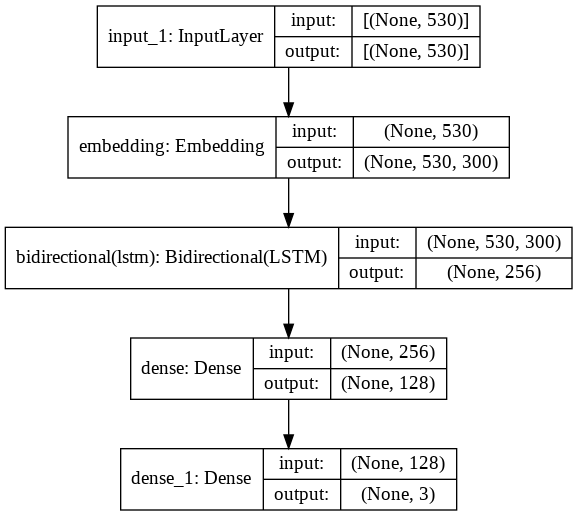

In [23]:
tf.keras.utils.plot_model(model, to_file='Model1.png', show_shapes=True)


#Model 2:

In [28]:
##### from tensorflow.keras.models import Model
#Input layer
input_layer = tf.keras.layers.Input(shape=(max_length,))
#Dense hidden layer
embed=tf.keras.layers.Embedding(vocab_size,300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)
layer11=tf.keras.layers.Conv1D(filters=10,kernel_size=3,activation='relu')(embed)
pool2=tf.keras.layers.MaxPool1D(pool_size=2)(layer11)
flatten=tf.keras.layers.Flatten()(pool2)
drop1=tf.keras.layers.Dropout(0.3)(flatten)
dense1=tf.keras.layers.Dense(32)(drop1)

#Output layer
output=tf.keras.layers.Dense(3,activation='softmax')(dense1)

#Creating a model
model = tf.keras.Model(inputs=input_layer,outputs=output)

In [29]:
check_point = ModelCheckpoint('best_model_2.h5', monitor='val_accuracy',  verbose=1, save_best_only=True, mode='min')

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy',tfa.metrics.F1Score(num_classes=3,average='micro'),tfa.metrics.HammingLoss(mode='multilabel')])

In [30]:
model.fit(padded_docs,y_train,validation_data=(padded_docs1,y_test),epochs=10,callbacks=[early_stop,check_point])

Epoch 1/10
223/225 [============================>.] - ETA: 0s - loss: 0.9771 - accuracy: 0.5533 - f1_score: 0.3840 - hamming_loss: 0.3910

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


225/225 [==============================] - 3s 9ms/step - loss: 0.9766 - accuracy: 0.5550 - f1_score: 0.3851 - hamming_loss: 0.3903 - val_loss: 0.9760 - val_accuracy: 0.6767 - val_f1_score: 0.4018 - val_hamming_loss: 0.3815

Epoch 00001: val_accuracy improved from inf to 0.67666, saving model to best_model_2.h5
Epoch 2/10
225/225 [==============================] - 2s 8ms/step - loss: 0.9589 - accuracy: 0.6187 - f1_score: 0.4267 - hamming_loss: 0.3639 - val_loss: 0.9633 - val_accuracy: 0.6590 - val_f1_score: 0.4412 - val_hamming_loss: 0.3565

Epoch 00002: val_accuracy improved from 0.67666 to 0.65902, saving model to best_model_2.h5
Epoch 3/10
225/225 [==============================] - 2s 8ms/step - loss: 0.9713 - accuracy: 0.5733 - f1_score: 0.4248 - hamming_loss: 0.3651 - val_loss: 0.9772 - val_accuracy: 0.6925 - val_f1_score: 0.4080 - val_hamming_loss: 0.3776

Epoch 00003: val_accuracy did not improve from 0.65902
Epoch 4/10
225/225 [==============================] - 2s 8ms/step - los

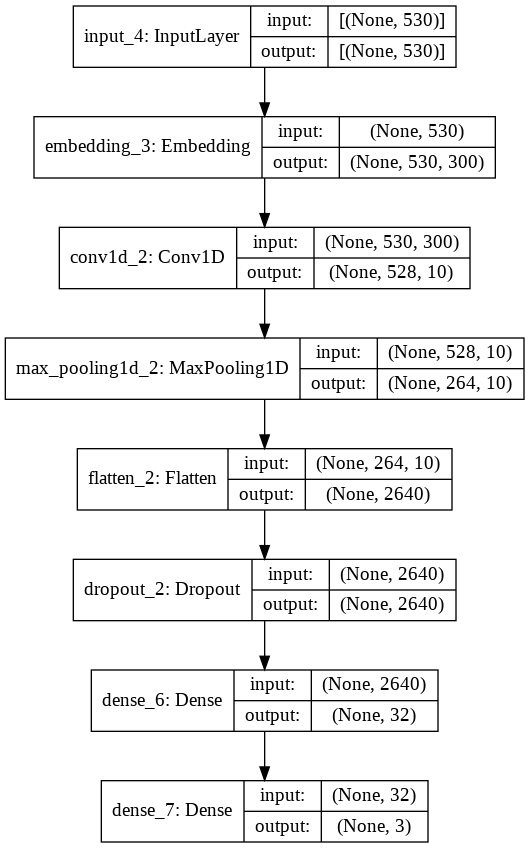

In [31]:
tf.keras.utils.plot_model(model, to_file='Model2.png', show_shapes=True)


#Model 3:

In [36]:
##### from tensorflow.keras.models import Model
#Input layer
input_layer = tf.keras.layers.Input(shape=(max_length,))
#Dense hidden layer
embed=tf.keras.layers.Embedding(vocab_size,300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)
layer11=tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu')(embed)
pool2=tf.keras.layers.MaxPool1D(pool_size=2)(layer11)
lstm_layer=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(pool2)
dense=tf.keras.layers.Dense(64,activation='relu')(lstm_layer)
output=tf.keras.layers.Dense(3,activation='softmax')(dense)

#Creating a model
model = tf.keras.Model(inputs=input_layer,outputs=output)

In [37]:
check_point = ModelCheckpoint('best_model_3.h5', monitor='val_accuracy',  verbose=1, save_best_only=True, mode='min')

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy',tfa.metrics.F1Score(num_classes=3,average='micro'),tfa.metrics.HammingLoss(mode='multilabel')])


In [38]:
model.fit(padded_docs,y_train,validation_data=(padded_docs1,y_test),epochs=10,callbacks=[early_stop,check_point])


Epoch 1/10
223/225 [============================>.] - ETA: 0s - loss: 0.9619 - accuracy: 0.6103 - f1_score: 0.4055 - hamming_loss: 0.3778

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


225/225 [==============================] - 9s 30ms/step - loss: 0.9593 - accuracy: 0.6108 - f1_score: 0.4057 - hamming_loss: 0.3773 - val_loss: 0.9548 - val_accuracy: 0.6884 - val_f1_score: 0.4657 - val_hamming_loss: 0.3408

Epoch 00001: val_accuracy improved from inf to 0.68842, saving model to best_model_3.h5
Epoch 2/10
225/225 [==============================] - 6s 26ms/step - loss: 0.8758 - accuracy: 0.7287 - f1_score: 0.5283 - hamming_loss: 0.2994 - val_loss: 0.8567 - val_accuracy: 0.7125 - val_f1_score: 0.5438 - val_hamming_loss: 0.2910

Epoch 00002: val_accuracy did not improve from 0.68842
Epoch 3/10
225/225 [==============================] - 6s 26ms/step - loss: 0.8189 - accuracy: 0.7251 - f1_score: 0.5566 - hamming_loss: 0.2814 - val_loss: 0.8388 - val_accuracy: 0.6767 - val_f1_score: 0.5604 - val_hamming_loss: 0.2804

Epoch 00003: val_accuracy improved from 0.68842 to 0.67666, saving model to best_model_3.h5
Epoch 4/10
225/225 [==============================] - 6s 26ms/step -

In [39]:
model.fit(padded_docs,y_train,validation_data=(padded_docs1,y_test),epochs=10,callbacks=[early_stop,check_point])


Epoch 1/10
  3/225 [..............................] - ETA: 9s - loss: 0.9560 - accuracy: 0.6875 - f1_score: 0.5567 - hamming_loss: 0.2986

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


224/225 [============================>.] - ETA: 0s - loss: 0.8646 - accuracy: 0.7068 - f1_score: 0.5371 - hamming_loss: 0.2939

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


225/225 [==============================] - 6s 27ms/step - loss: 0.8648 - accuracy: 0.7067 - f1_score: 0.5368 - hamming_loss: 0.2940 - val_loss: 0.8868 - val_accuracy: 0.7255 - val_f1_score: 0.5186 - val_hamming_loss: 0.3071

Epoch 00001: val_accuracy did not improve from 0.51323
Epoch 2/10
225/225 [==============================] - 6s 26ms/step - loss: 0.8602 - accuracy: 0.6949 - f1_score: 0.5301 - hamming_loss: 0.2983 - val_loss: 0.8917 - val_accuracy: 0.5226 - val_f1_score: 0.5106 - val_hamming_loss: 0.3122

Epoch 00002: val_accuracy did not improve from 0.51323
Epoch 3/10
225/225 [==============================] - 6s 26ms/step - loss: 0.8664 - accuracy: 0.6574 - f1_score: 0.5261 - hamming_loss: 0.3008 - val_loss: 0.8870 - val_accuracy: 0.7302 - val_f1_score: 0.5106 - val_hamming_loss: 0.3122

Epoch 00003: val_accuracy did not improve from 0.51323
Epoch 4/10
225/225 [==============================] - 6s 26ms/step - loss: 0.8676 - accuracy: 0.6804 - f1_score: 0.5307 - hamming_loss: 0.

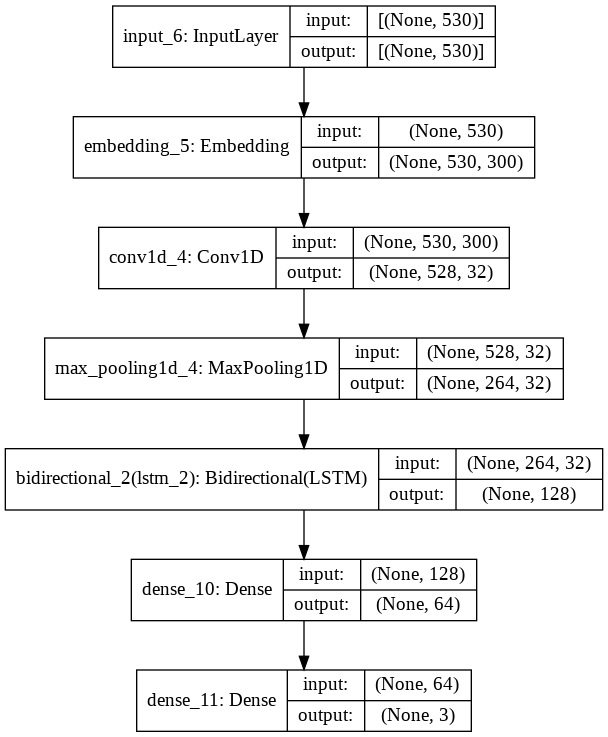

In [40]:
tf.keras.utils.plot_model(model, to_file='Model3.png', show_shapes=True)
